In [1]:
from os import environ
environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import train_test_split

Using plaidml.keras.backend backend.


In [2]:
df_sample = pd.read_csv('sample_submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
x = df_train.drop(columns=['label']).astype('float32')
test = df_test.astype('float32')
y = df_train['label']

In [4]:
x = x.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
x = x / 255.0
test = test / 255.0

In [5]:
y = to_categorical(y, 10)

In [6]:
x.shape, y.shape, test.shape

((42000, 28, 28, 1), (42000, 10), (28000, 28, 28, 1))

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.10)

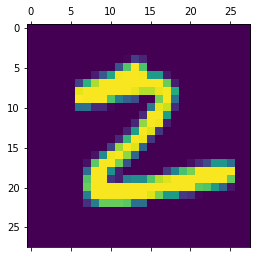

In [8]:
plt.matshow(x_train[666])

In [19]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
__________

In [21]:
model_history = model.fit(x_train, y_train, epochs=10, batch_size = 25, validation_data=(x_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 37s 989us/step - loss: 0.0305 - acc: 0.9901 - val_loss: 0.0126 - val_acc: 0.9961
Epoch 2/10
37800/37800 [==============================] - 27s 723us/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0092 - val_acc: 0.9969
Epoch 3/10
37800/37800 [==============================] - 28s 731us/step - loss: 0.0082 - acc: 0.9973 - val_loss: 0.0072 - val_acc: 0.9978
Epoch 4/10
37800/37800 [==============================] - 27s 724us/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0067 - val_acc: 0.9981
Epoch 5/10
37800/37800 [==============================] - 27s 724us/step - loss: 0.0057 - acc: 0.9981 - val_loss: 0.0079 - val_acc: 0.9981
Epoch 6/10
37800/37800 [==============================] - 29s 755us/step - loss: 0.0050 - acc: 0.9983 - val_loss: 0.0058 - val_acc: 0.9984
Epoch 7/10
37800/37800 [==============================] - 28s 747us/step - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0

In [20]:
model.metrics_names

['loss', 'acc']

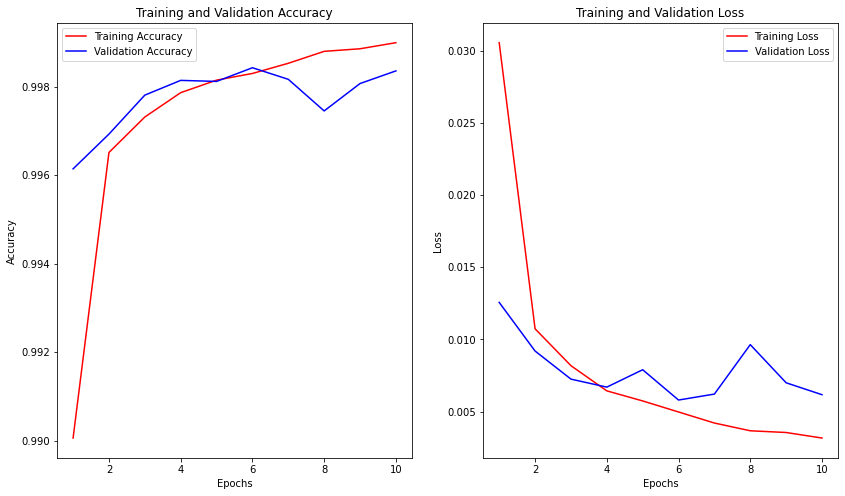

In [22]:
acc_train=model_history.history['acc']
acc_val=model_history.history['val_acc']
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,11)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.plot(epochs,acc_train,'r',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs,loss_train,'r',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()